# Pymaceuticals Inc.

**By:** Tania Barrera (*tsbarr*)

---

This Jupyter Notebook goes over my analysis for Challenge 5 of the UofT SCS EdX Data Bootcamp and uses the python module `matplotlib`. In this challenge, I was asked to generate a series of tables and figures needed for a technical report about a pharmaceutical study, as well as to provide a top-level summary of the study results.

## Prepare the Data

In [2]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [3]:

# Study data files
mouse_metadata_path = Path('data', 'Mouse_metadata.csv')
study_results_path = Path('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single DataFrame
all_data = (study_results
    .merge(
        mouse_metadata,
        how='left',
        on= 'Mouse ID'
    )
)

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# checking the number of mice

all_data['Mouse ID'].nunique()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
all_data[['Mouse ID', 'Timepoint']].value_counts().head(10)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
all_data.loc[all_data['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data.loc[all_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by drug regimen and aggregate using summary stats of tumor volume
summary_statistics = (clean_data
    .groupby('Drug Regimen', as_index=True)
    # based on: https://stackoverflow.com/a/43897124
    .aggregate(
        {
        'Tumor Volume (mm3)':
            ['mean','median','var','std','sem']
        }
    )
)
# visualize results
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [35]:
counts_by_regimen = (clean_data
    .groupby('Drug Regimen')['Mouse ID']
    .count()
    .sort_values(ascending=False)
)
counts_by_regimen

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

In [ ]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts_by_regimen.plot(
        x='Drug Regimen',
        kind='bar',
        ylabel='# of Observed Mouse Timepoints'
    )

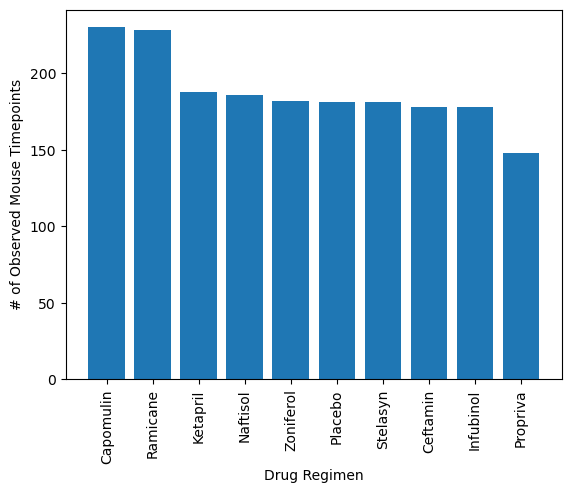

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# https://www.w3resource.com/graphics/matplotlib/barchart/matplotlib-barchart-exercise-1.php
plt.bar(counts_by_regimen.index, counts_by_regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# https://www.pythoncharts.com/matplotlib/rotating-axis-labels/
plt.xticks(rotation=90)

plt.show()



<Axes: ylabel='Sex'>

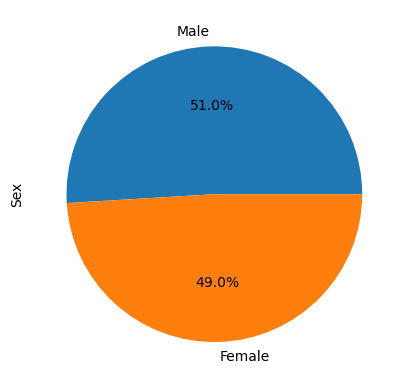

In [44]:
counts_by_sex = (clean_data
    .groupby('Sex')['Sex']
    .count()
    .sort_values(ascending=False)
)


In [ ]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas

# based on: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/


counts_by_sex.plot(
    y='Sex',
    kind='pie',
    autopct='%1.1f%%'
)


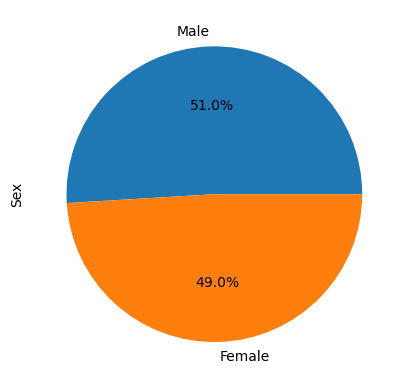

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(
    counts_by_sex.values,
    labels=counts_by_sex.index,
    autopct='%1.1f%%'
)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = (clean_data
    .query('`Drug Regimen` in @regimen_list')
    .groupby('Mouse ID', as_index=False)
    .aggregate(
        {'Timepoint': 'max'}
    )
)
last_timepoints.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [71]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints = last_timepoints.merge(clean_data, how='left')
last_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [69]:
last_timepoints['Timepoint'].min()

0

In [85]:

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice = (last_timepoints
        .loc[last_timepoints['Drug Regimen'] == regimen,
            ['Drug Regimen', 'Tumor Volume (mm3)']]
    )

    q1 = mice['Tumor Volume (mm3)'].quantile(.25)
    q3 = mice['Tumor Volume (mm3)'].quantile(.75)

    upperL = q3 + (1.5*(q3-q1))
    lowerL = q1 - (1.5*(q3-q1))

    # add subset
    print(regimen)
    print(upperL)
    print(lowerL)

    # Determine outliers using upper and lower bounds
    outliers = mice.loc[(mice['Tumor Volume (mm3)'] > upperL) | (mice['Tumor Volume (mm3)'] < lowerL),'Tumor Volume (mm3)']
    # print results
    print(f"{regimen}'s potential outliers: {outliers}")



Capomulin
51.83201549
20.70456164999999
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
54.30681135
17.912664470000003
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
82.74144559000001
36.83290494999999
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
87.66645829999999
25.355449580000002
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
